In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans,DBSCAN
import random
from scipy.spatial import distance

### i-k-means

In [242]:
def down(data):
    print(level)
    cA = pywt.downcoef('d', data, 'haar', level=level)    
    cD = pywt.downcoef('a', data, 'haar', level=level) 
    return cA, cD

def centnters_updata(centers):
    new_centers = []
    for c in centers:
        new_centers+=[c,c]
    return np.asarray(new_centers)

def ik_mean(data):
    global centers, k, level, recunstruct, y_kmeans
    cA, cD = down(data)
    X = np.asarray(list(zip(cA, cD)))
    #print("end1 - ", cA)
    if centers is not None:
        centers = centnters_updata(centers)
      #  print(k, len(centers))
        kmeans = KMeans(n_clusters= k, init = centers)
    else:
        kmeans = KMeans(n_clusters= k)
   # print("end2")
    k*=2
    level -= 1
    recunstruct = 2**level        
   
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
   # print("end3", y_kmeans)
    if level <= END_DECOMPOSITION_LVL:
        return 
    ik_mean(data)
    return 
    
def label(data, y_kmeans):
    global recunstruct
    every_point_classes = [y for y in y_kmeans for i in range(recunstruct) ]
    every_point_classes = np.asarray(every_point_classes)[:len(data)]
    return every_point_classes

### Visualization

In [183]:
def all_patterns(data, every_point_classes, dclass, recunstruct):
    mask = every_point_classes == dclass
    indx = np.where(mask)[0]  

    count = len(indx)//recunstruct
    print(len(data))
    patterns = []

    for i in range(count): 
        patterns.append(data[indx[i*recunstruct:(i+1)*recunstruct]])
    return patterns

def plot_pattern(patterns, color = 'b', dclass = 'x', save = False):    
    count = len(patterns)
   # print(count)
    if count <= 1:
        return
    fig, axs = plt.subplots(count, 1, constrained_layout=False, figsize = (6,1*count))
    for i in range(count): 
        axs[i].plot(list(patterns[i]), color = color);
    fig.suptitle('Class = %d, Pattern count = %d\n'%(dclass, count), fontsize=14)
    fig.tight_layout()
    if save == True:
        fig.savefig('Class_%d.png'%dclass)   
    plt.show();

In [116]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19890101,0,5.0,312,54,9.0,313,8.1,306,6.2,287,5.3,252,0.0,0.0,0.0,0,0.99
1,19890101,1,4.7,316,46,6.8,325,7.4,329,4.6,318,2.2,261,0.0,0.0,0.0,0,1.00
2,19890101,2,4.5,315,41,5.0,347,6.8,2,4.0,18,2.2,94,0.0,0.0,0.0,0,1.00


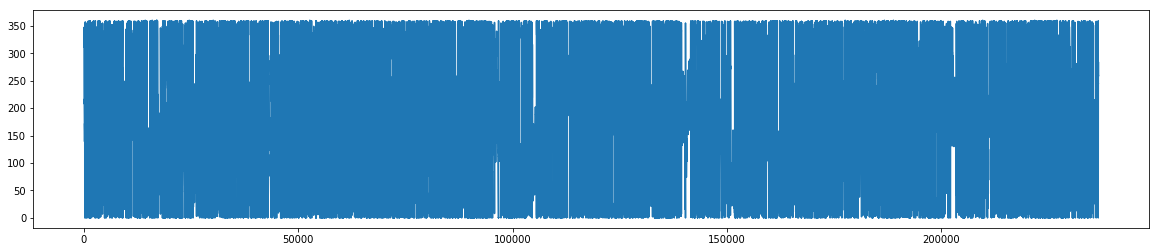

In [72]:
plt.figure(figsize = (20,4))
train_data = data[3]
train_data.plot()

In [246]:
START_DECOMPOSITION_LVL = 14
END_DECOMPOSITION_LVL = 6

k = 4
y_kmeans = None
level = START_DECOMPOSITION_LVL
recunstruct = 2**(level)
centers = None

ik_mean(train_data)

14
13
12
11
10
9
8


C:\Users\Zoya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


7


In [254]:
labels = np.asarray([y for y in y_kmeans for i in range(recunstruct) ])


In [ ]:
dclass = 340
print(k)
patterns = all_patterns(train_data, labels, dclass, recunstruct)
plot_pattern(patterns, dclass = dclass)

1024
236664
4


In [257]:
labels

array([348, 348, 348, ..., 182, 182, 182])